In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

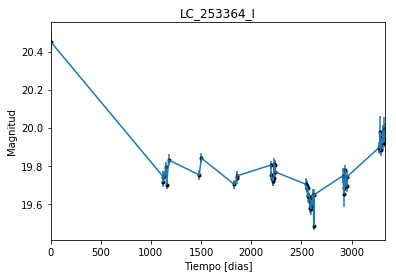

In [2]:
data = np.genfromtxt('LC_253364_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_253364_I')
plt.savefig("LC_253364_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

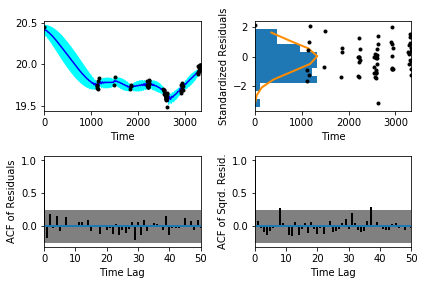

In [5]:
sample.assess_fit()

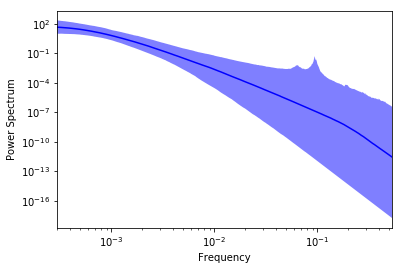

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

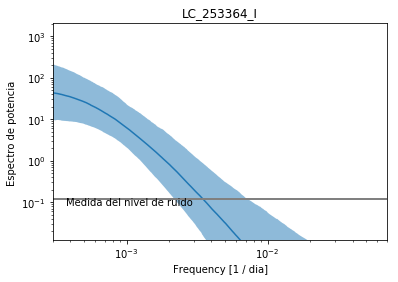

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_253364_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_253364_I')

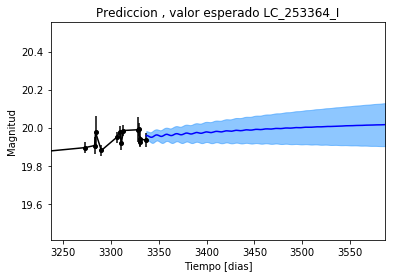

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_253364_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_253364_I')

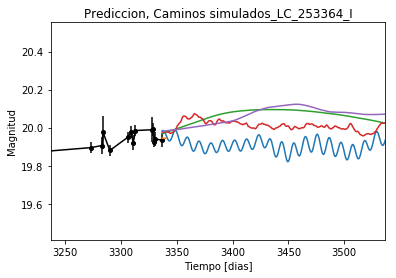

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_253364_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


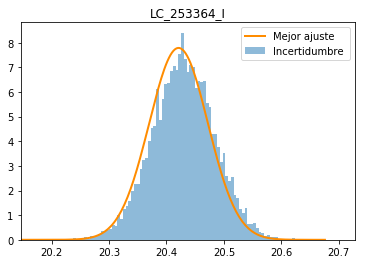

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_253364_I')
plt.savefig("Mejor_ajuste_LC_253364_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_253364_I')

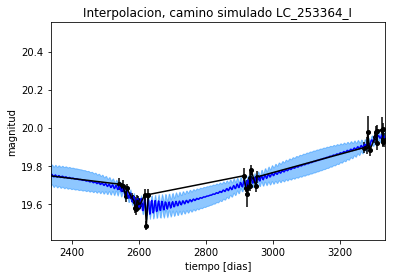

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_I')

Text(0.5,1,'Interpolacion, camino simulado LC_253364_I')

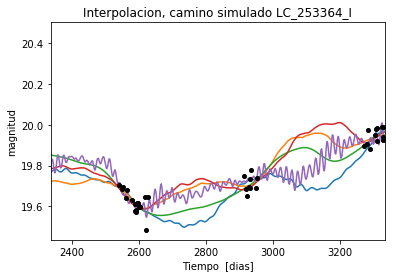

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 694.426913009
Median: 0.00587790655528
Standard deviation: 0.188798724786
68% credibility interval: [ 0.00072368  0.15387807]
95% credibility interval: [  3.39421062e-04   7.59191549e-01]
99% credibility interval: [  3.05090297e-04   9.79320540e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 281.942693016
Median: 0.00125231685819
Standard deviation: 0.0765895518485
68% credibility interval: [ 0.00041169  0.01464911]
95% credibility interval: [ 0.00031084  0.21186789]
99% credibility interval: [  3.02049184e-04   6.26392586e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 695.61546916
Median: 0.00309567483625
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 56.6476545603
Median: 114.424177945
Standard deviation: 2.72468172394
68% credibility interval: [ 112.6413569   116.37820568]
95% credibility interval: [ 110.29210289  122.3243207 ]
99% credibility interval: [ 108.40568925  122.67893228]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 369.490596007
Median: 0.247164553151
Standard deviation: 2.01806746307
68% credibility interval: [ 0.02634202  3.05493446]
95% credibility interval: [ 0.01159802  6.72375885]
99% credibility interval: [  8.91716879e-03   9.72881261e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 361.083108016
Median: 0.33913061733
Standard deviation: 7.35804180386
68% credibility interval: [ 0.01793198  4.39377373]
95% credibility interval: [  7.08

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 263.610855961
Median: 1.84958851886e-18
Standard deviation: 1.13159362035e+93
68% credibility interval: [  2.56511928e-53   3.16495576e+01]
95% credibility interval: [  5.40949230e-108   9.36877637e+031]
99% credibility interval: [  5.09834733e-135   3.83866852e+093]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1425.44084958
Median: 19.909626644
Standard deviation: 0.166087741457
68% credibility interval: [ 19.78434189  20.07001255]
95% credibility interval: [ 19.62139858  20.29641842]
99% credibility interval: [ 19.45742561  20.49175271]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 580.828752313
Median: 0.0262764430408
Standard deviation: 0.206234103301
68% credibility interval: [ 0.          0.23856718]
95% credibility interval: [ 0.          0.80608014]
99% credibility interval: [ 0.        0.977194]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 580.828752313
Median: 0.0262764430408
Standard deviation: 0.206234103301
68% credibility interval: [ 0.          0.23856718]
95% credibility interval: [ 0.          0.80608014]
99% credibility interval: [ 0.        0.977194]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 363.023056769
Median: 0.0
Standard deviation: 0.00028512003674
68% credibility

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 56.6476545603
Median: 114.424177945
Standard deviation: 2.72468172394
68% credibility interval: [ 112.6413569   116.37820568]
95% credibility interval: [ 110.29210289  122.3243207 ]
99% credibility interval: [ 108.40568925  122.67893228]


In [27]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 827.101461499
Median: 0.0730758721636
Standard deviation: 0.0872677303138
68% credibility interval: [ 0.04154016  0.1470417 ]
95% credibility interval: [ 0.02600491  0.31202786]
99% credibility interval: [ 0.02007027  0.55445913]


In [28]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 126.360167471
Median: 1.33723138949
Standard deviation: 0.239465347536
68% credibility interval: [ 1.10400337  1.58343628]
95% credibility interval: [ 0.88490553  1.82361777]
99% credibility interval: [ 0.73777036  1.94764334]


In [29]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 765.164819091
Median: 4.52467194815e-05
Standard deviation: 0.0444906173211
68% credibility interval: [  1.86203626e-06   1.06220136e-03]
95% credibility interval: [  2.78161406e-37   2.66697653e-02]
99% credibility interval: [  5.65001200e-100   2.66461279e-001]


In [30]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 694.426913009
Median: (-0.0369319761051-1.81557876915j)
Standard deviation: 1.75679326187
68% credibility interval: [-0.96684443-3.36421406j -0.00454701-0.58862102j]
95% credibility interval: [ -4.77014119e+00+0.j         -2.13264543e-03-0.0014548j]
99% credibility interval: [ -6.15325242e+00+0.j          -1.91693887e-03-0.75446653j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 281.942693016
Median: (-0.00786853888331+0.59652511144j)
Standard deviation: 1.38227884504
68% credibility interval: [-0.09204306+2.81030169j -0.00258673+0.55536577j]
95% credibility interval: [-1.33120521+3.98964292j -0.00195309+0.j        ]
99% credibility interval: [ -3.93574069e+00+4.87887059j  -1.89783099e-03+0.j        ]
Posterior summa